<a href="https://colab.research.google.com/github/Takiulhasan/DeepLearning/blob/main/Fake_News_Detection_using_Deeplearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from wordcloud import WordCloud

In [2]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Conv1D, MaxPool1D
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

In [3]:
fake = pd.read_csv('https://raw.githubusercontent.com/laxmimerit/fake-real-news-dataset/main/data/Fake.csv')

In [4]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [5]:
fake.columns

Index(['title', 'text', 'subject', 'date'], dtype='object')

In [6]:
fake['subject'].value_counts()

News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: subject, dtype: int64

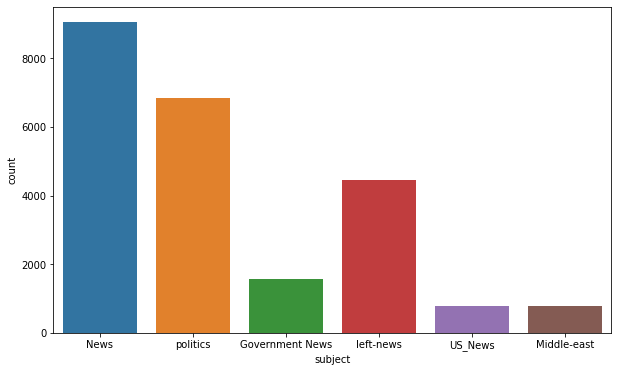

In [7]:
plt.figure(figsize=(10,6))
sns.countplot(x='subject',data=fake)

Wordcloud

In [10]:
text= ' '.join(fake['text'].tolist())

In [11]:
' '.join(['this','is','a','data'])

'this is a data'

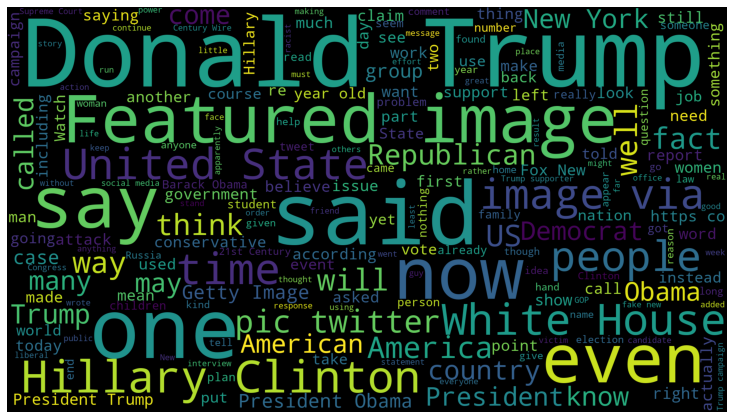

In [14]:
wordcloud = WordCloud(width=1920,height=1080).generate(text)
fig=plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()


## Exploring Real News Dataset

In [15]:
real=pd.read_csv('https://raw.githubusercontent.com/laxmimerit/fake-real-news-dataset/main/data/True.csv')

In [16]:
text= ' '.join(real['text'].tolist())

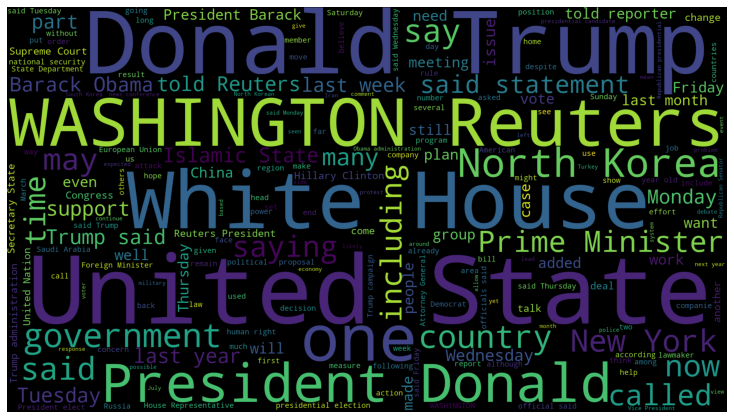

In [17]:
wordcloud = WordCloud(width=1920,height=1080).generate(text)
fig=plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [18]:
real.sample(5)

,title,text,subject,date
20760,Hurricane Irma likely to drop to Category 4 up...,(Reuters) - Hurricane Irma is likely to be dow...,worldnews,"September 7, 2017"
3275,House panel wants Comey recordings,WASHINGTON (Reuters) - The leaders of the Hous...,politicsNews,"June 9, 2017"
9315,California Assembly passes gun control bills,"SACRAMENTO, Calif. (Reuters) - The California ...",politicsNews,"June 2, 2016"
14532,"Egypt orders suspected Libyan militant, 14 oth...",CAIRO (Reuters) - The Egyptian public prosecut...,worldnews,"November 17, 2017"
5864,Trump needs to accept waterboarding is prohibi...,GENEVA (Reuters) - U.S. President Donald Trump...,politicsNews,"January 30, 2017"


In [36]:
unknown_publishers= []
for index, row in enumerate (real.text.values):
  try:
    record = row.split(' - ',maxsplit=1)
    record[1]

    assert(len(record[0])<120)
  except:
    unknown_publishers.append(index)

In [39]:
len(unknown_publishers)

229

In [40]:
real.iloc[unknown_publishers].text

7        The following statements were posted to the ve...
8        The following statements were posted to the ve...
12       The following statements were posted to the ve...
13       The following statements were posted to the ve...
14        (In Dec. 25 story, in second paragraph, corre...
                               ...                        
20135     (Story corrects to million from billion in pa...
20500     (This Sept 8 story corrects headline, clarifi...
20667     (Story refiles to add dropped word  not , in ...
21246     (Story corrects third paragraph to show Mosul...
21339     (Story corrects to fix spelling in paragraph ...
Name: text, Length: 229, dtype: object

In [41]:
real.iloc[8970]

title      Graphic: Supreme Court roundup
text                                     
subject                      politicsNews
date                       June 16, 2016 
Name: 8970, dtype: object

In [42]:
real.drop(8970,axis=0)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


In [43]:
publisher= []
tmp_text= []

for index,row in enumerate (real.text.values):
  if index in unknown_publishers:
    tmp_text.append(row)
    publisher.append('Unknown')
  
  else:
    record= row.split('-',maxsplit=1)
    publisher.append(record[0].strip())
    tmp_text.append(record[1].strip())
    

In [44]:
real['publisher']=publisher
real['text'] = tmp_text

In [45]:
real.head()

,title,text,subject,date,publisher
0,"As U.S. budget fight looms, Republicans flip t...",The head of a conservative Republican faction ...,politicsNews,"December 31, 2017",WASHINGTON (Reuters)
1,U.S. military to accept transgender recruits o...,Transgender people will be allowed for the fir...,politicsNews,"December 29, 2017",WASHINGTON (Reuters)
2,Senior U.S. Republican senator: 'Let Mr. Muell...,The special counsel investigation of links bet...,politicsNews,"December 31, 2017",WASHINGTON (Reuters)
3,FBI Russia probe helped by Australian diplomat...,Trump campaign adviser George Papadopoulos tol...,politicsNews,"December 30, 2017",WASHINGTON (Reuters)
4,Trump wants Postal Service to charge 'much mor...,President Donald Trump called on the U.S. Post...,politicsNews,"December 29, 2017",SEATTLE/WASHINGTON (Reuters)


In [46]:
real.shape

(21417, 5)

In [50]:
empty_fake_index=[index for index, text in enumerate(fake.text.tolist()) if str (text).strip()==""]

In [51]:
fake.iloc[empty_fake_index]

,title,text,subject,date
10923,TAKE OUR POLL: Who Do You Think President Trum...,,politics,"May 10, 2017"
11041,Joe Scarborough BERATES Mika Brzezinski Over “...,,politics,"Apr 26, 2017"
11190,WATCH TUCKER CARLSON Scorch Sanctuary City May...,,politics,"Apr 6, 2017"
11225,MAYOR OF SANCTUARY CITY: Trump Trying To Make ...,,politics,"Apr 2, 2017"
11236,SHOCKER: Public School Turns Computer Lab Into...,,politics,"Apr 1, 2017"
...,...,...,...,...
21816,BALTIMORE BURNS: MARYLAND GOVERNOR BRINGS IN N...,,left-news,"Apr 27, 2015"
21826,FULL VIDEO: THE BLOCKBUSTER INVESTIGATION INTO...,,left-news,"Apr 25, 2015"
21827,(VIDEO) HILLARY CLINTON: RELIGIOUS BELIEFS MUS...,,left-news,"Apr 25, 2015"
21857,(VIDEO)ICE PROTECTING OBAMA: WON’T RELEASE NAM...,,left-news,"Apr 14, 2015"


In [53]:
real['text']=real['text']+ " " + real['text']
fake['text']=fake['text']+ " " + fake['text']

In [54]:
real['text'] = real['text'].apply(lambda x: str (x).lower())
fake['text'] = fake['text'].apply(lambda x: str (x).lower())

## Preprocessing Text

In [56]:
real['class']= 1
fake['class']= 0

In [57]:
real.columns

Index(['title', 'text', 'subject', 'date', 'publisher', 'class'], dtype='object')

In [58]:
real=real[['text','class']]


In [59]:
fake=fake[['text','class']]

In [61]:
data= real.append(fake,ignore_index=True)

In [62]:
data.sample(5)

,text,class
21975,donald trump wants us to believe that he is no...,0
44170,this latest move by america s notorious transp...,0
18891,the united nations on wednesday raised concern...,1
33490,two days before the berlin killings resurrecte...,0
15434,the u.s. state department said on tuesday it w...,1


In [63]:
# https://github.com/laxmimerit/preprocess_kgptalkie

In [65]:
!pip install spacy==2.2.3
!python -m spacy download en_core_web_sm
!pip install beautifulsoup4==4.9.1
!pip install textblob==0.15.3

     |████████████████████████████████| 10.4MB 5.5MB/s 
     |████████████████████████████████| 2.2MB 28.4MB/s 
  Found existing installation: thinc 7.4.0
    Uninstalling thinc-7.4.0:
      Successfully uninstalled thinc-7.4.0
  Found existing installation: spacy 2.2.4
    Uninstalling spacy-2.2.4:
      Successfully uninstalled spacy-2.2.4
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
     |████████████████████████████████| 122kB 5.1MB/s 
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [66]:
pip install git+https://github.com/laxmimerit/preprocess_kgptalkie.git --upgrade --force-reinstall

  Cloning https://github.com/laxmimerit/preprocess_kgptalkie.git to /tmp/pip-req-build-25b8i_mu
  Running command git clone -q https://github.com/laxmimerit/preprocess_kgptalkie.git /tmp/pip-req-build-25b8i_mu
  Created wheel for preprocess-kgptalkie: filename=preprocess_kgptalkie-0.1.3-cp37-none-any.whl size=11759 sha256=bba02028fcb61b2a284a7943103a15e4eb24af56be3212ec1ebcd5860dd1bfc2
  Stored in directory: /tmp/pip-ephem-wheel-cache-mw_3lopy/wheels/a8/18/22/90afa4bd43247fb9a75b710a4a3fcd94966c022ce9e3c7d0a6
Successfully built preprocess-kgptalkie


In [67]:
import preprocess_kgptalkie as ps

In [70]:
data ['text'] = data ['text'].apply(lambda x: ps.remove_special_chars(x))

In [71]:
ps.remove_special_chars('this,.@ # is gre@t ')

'this is gret'

In [72]:
data.head()

,text,class
0,the head of a conservative republican faction ...,1
1,transgender people will be allowed for the fir...,1
2,the special counsel investigation of links bet...,1
3,trump campaign adviser george papadopoulos tol...,1
4,president donald trump called on the us postal...,1


WORD2VECTOR

In [73]:
import gensim

In [74]:
y=data['class'].values

In [75]:
X=[d.split() for d in data['text'].tolist()]

In [77]:
type(X[0])

list

In [78]:
print(X[0])

['the', 'head', 'of', 'a', 'conservative', 'republican', 'faction', 'in', 'the', 'us', 'congress', 'who', 'voted', 'this', 'month', 'for', 'a', 'huge', 'expansion', 'of', 'the', 'national', 'debt', 'to', 'pay', 'for', 'tax', 'cuts', 'called', 'himself', 'a', 'fiscal', 'conservative', 'on', 'sunday', 'and', 'urged', 'budget', 'restraint', 'in', '2018', 'in', 'keeping', 'with', 'a', 'sharp', 'pivot', 'under', 'way', 'among', 'republicans', 'us', 'representative', 'mark', 'meadows', 'speaking', 'on', 'cbs', 'face', 'the', 'nation', 'drew', 'a', 'hard', 'line', 'on', 'federal', 'spending', 'which', 'lawmakers', 'are', 'bracing', 'to', 'do', 'battle', 'over', 'in', 'january', 'when', 'they', 'return', 'from', 'the', 'holidays', 'on', 'wednesday', 'lawmakers', 'will', 'begin', 'trying', 'to', 'pass', 'a', 'federal', 'budget', 'in', 'a', 'fight', 'likely', 'to', 'be', 'linked', 'to', 'other', 'issues', 'such', 'as', 'immigration', 'policy', 'even', 'as', 'the', 'november', 'congressional', 'e

In [80]:
DIM=100
w2v_model=gensim.models.Word2Vec(sentences=X, size=DIM, window=10,min_count=1)

In [81]:
len(w2v_model.wv.vocab)

228263

In [84]:
w2v_model.wv['love']

array([-0.6321252 ,  2.954674  ,  0.35969317,  3.8450246 ,  3.2384982 ,
        2.7555537 , -3.0955596 , -0.99257624, -0.99684536, -1.0929754 ,
       -1.4233543 ,  1.9139606 ,  3.862727  ,  2.796347  ,  4.987734  ,
        5.2566705 , -4.5994225 ,  3.4272974 ,  1.212528  , -2.8987439 ,
       -1.4937756 , -2.4886906 , -3.688036  ,  3.6147    , -1.728717  ,
        2.299508  , -1.5703658 , -4.944876  , -1.0452001 ,  2.852661  ,
       -3.6571577 , -7.5311103 , -0.61048806,  2.9207625 , -1.9008102 ,
        3.1555068 , -6.8653507 , -2.1107826 , -1.415973  , -5.63843   ,
       -2.3318658 , -1.0996652 , -3.84004   , -3.0676093 ,  0.09421539,
       -0.7663984 , -0.6596071 ,  0.93143237,  2.6580787 , -2.2911472 ,
       -2.559631  , -2.3673177 ,  0.01667769,  2.9692724 ,  2.0947094 ,
        5.9158144 , -0.93047047, -0.21642126,  0.4013518 ,  0.12676823,
        1.0514636 ,  3.9069912 ,  0.17840713, -1.775393  , -3.2018669 ,
       -0.45292762, -0.451051  ,  0.9870154 , -4.856791  ,  2.21

In [85]:
w2v_model.wv['india']

array([ 0.16520487,  1.9819634 ,  0.17516144, -3.8339963 ,  2.9211197 ,
        0.31755617,  1.7469186 ,  2.2512338 , -2.6124918 ,  0.6377201 ,
       -0.5799675 , -0.5585606 , -1.9707205 ,  0.07426488,  1.4189901 ,
       -1.4879863 , -0.5497573 ,  1.2565557 ,  0.07836843,  1.8954741 ,
       -3.3508916 ,  2.9538543 ,  3.7474935 , -0.4562379 , -0.02583286,
       -0.90270257,  1.5641414 , -0.11042648,  2.4256217 , -2.3316782 ,
        2.4619756 , -0.81449825, -0.79237324,  2.557428  ,  1.8378065 ,
        0.443571  ,  1.5221403 ,  1.8839232 , -1.632002  ,  1.5098524 ,
        3.141219  ,  2.9181955 , -0.50179815, -0.3126846 ,  4.7110357 ,
       -0.81718165, -2.3499253 , -3.0181084 ,  2.5735812 , -2.8968866 ,
       -4.12717   ,  3.1194525 , -3.7220194 ,  2.856856  , -0.15605849,
       -1.311608  ,  1.5042518 ,  1.1462034 ,  2.1035967 ,  0.81962204,
        0.8932804 ,  3.0712097 ,  0.19740318, -1.0969095 ,  5.290232  ,
        6.55717   , -0.7185367 ,  2.713648  , -1.5002416 ,  2.71

In [88]:
w2v_model.wv.most_similar('trump')

[('trumptrump', 0.646785318851471),
 ('he', 0.6425581574440002),
 ('trumpthe', 0.6414313912391663),
 ('trumps', 0.640499472618103),
 ('him', 0.574148416519165),
 ('his', 0.5375035405158997),
 ('trumpit', 0.529495894908905),
 ('trumpas', 0.5235206484794617),
 ('cruz', 0.5215761661529541),
 ('territorytrump', 0.5125940442085266)]

In [89]:
tokenizer= Tokenizer()
tokenizer.fit_on_texts(X)

In [90]:
X = tokenizer.texts_to_sequences(X)

In [92]:
#tokenizer.word_index

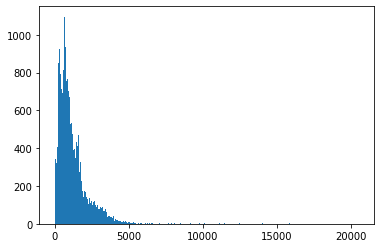

In [95]:
plt.hist([len (x) for x in X],bins=700)
plt.show()

In [96]:
nos= np.array([len(x) for x in X])
len(nos[nos>1000])

19813

In [97]:
maxlen = 1000
X= pad_sequences(X,maxlen=maxlen)

In [99]:
len(X[101])

1000

In [107]:
vocab_size = len(tokenizer.word_index)+1
vocab= tokenizer.word_index

In [108]:
def get_weight_matrix(model):
  weight_matrix = np.zeros((vocab_size,DIM))

  for word, i in vocab.items():
    weight_matrix[i] = model.wv[word]
  
  return weight_matrix

In [115]:
embedding_vectors = get_weight_matrix(w2v_model) 

In [116]:
embedding_vectors.shape

(228264, 100)

In [118]:
model=Sequential()
model.add(Embedding(vocab_size,output_dim=DIM, weights = [embedding_vectors], input_length=maxlen, trainable= False))
model.add(LSTM(units=128))
model.add(Dense(1,activation= 'sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy' , metrics= ['acc'])


In [119]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 1000, 100)         22826400  
_________________________________________________________________
lstm (LSTM)                  (None, 128)               117248    
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 22,943,777
Trainable params: 117,377
Non-trainable params: 22,826,400
_________________________________________________________________


In [122]:
X_train, X_test,y_train,y_test=train_test_split(X,y)

In [124]:
model.fit(X_train, y_train, validation_split=0.3, epochs=6)

Epoch 1/6
737/737 [==============================] - 594s 802ms/step - loss: 0.1516 - acc: 0.9458 - val_loss: 0.0904 - val_acc: 0.9717
Epoch 2/6
737/737 [==============================] - 617s 837ms/step - loss: 0.0550 - acc: 0.9833 - val_loss: 0.0657 - val_acc: 0.9779
Epoch 3/6
737/737 [==============================] - 635s 861ms/step - loss: 0.0450 - acc: 0.9844 - val_loss: 0.0359 - val_acc: 0.9885
Epoch 4/6
737/737 [==============================] - 644s 874ms/step - loss: 0.0364 - acc: 0.9880 - val_loss: 0.0430 - val_acc: 0.9877
Epoch 5/6
737/737 [==============================] - 632s 858ms/step - loss: 0.0160 - acc: 0.9951 - val_loss: 0.0315 - val_acc: 0.9910
Epoch 6/6
737/737 [==============================] - 637s 864ms/step - loss: 0.0081 - acc: 0.9980 - val_loss: 0.0254 - val_acc: 0.9933


In [125]:
y_pred=(model.predict (X_test) >= 0.5 ).astype(int)

In [126]:
accuracy_score(y_test,y_pred)

0.9934966592427616

In [127]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5935
           1       0.99      0.99      0.99      5290

    accuracy                           0.99     11225
   macro avg       0.99      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225



In [128]:
x=['this is a news']

In [129]:
X_test

array([[   0,    0,    0, ..., 4018,  102,  428],
       [   1,  576,  270, ...,   22,  576,  344],
       [1397, 2991,  343, ...,  232, 2570,  694],
       ...,
       [   0,    0,    0, ...,  294, 1696, 1661],
       [   0,    0,    0, ...,   14,  188,  231],
       [   0,    0,    0, ...,  878,   46, 1464]], dtype=int32)

In [135]:
x= [' this is a news']
x=tokenizer.texts_to_sequences(x)
pad_sequences(x,maxlen=maxlen)

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0

In [137]:
(model.predict(x) >=0.5).astype(int)

array([[0]])

In [139]:
x=['The death toll climbed by 54 in 24 hours to 13,399, according to the latest government data released on Friday.Another 1,955 people recovered from the illness through treatment at home and hospital care during that time, bringing the total to 778,421.Khulna reported 1,033 new cases in the last 24 hours, the most among the eight divisions in the tally, followed by Dhaka with 945 and Rajshahi with 818.As many as 20,882 samples were tested across the country, yielding a positivity rate of 18.59 percent.The latest official figures put the recovery rate at 92.12 percent, while the mortality rate stands at 1.59 percent.Globally, over 177.44 million people have been infected by the novel coronavirus and 3.84 million have died, according to a tally by Johns Hopkins University.']

x=tokenizer.texts_to_sequences(x)
pad_sequences(x,maxlen=maxlen)


array([[    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
      

In [140]:
(model.predict(x) >=0.5).astype(int)

array([[1]])